**Football Players Price Prediction - EDA**
****
In this notebook we will,
* display all the summary statistics of our data.
* Examine features to find which are necessary and which are not.
* Explore the correlations between the features and our target variable "price".
* Visualise categorical features and the corresponding players' average price.
****
*We will end up in understanding about which features are important and which are not. Here We wont do any manipulations on dataset instead we will be processing our data when creating models using the observations from this EDA.*

In [1]:
# Importing all modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# Displays all columns without truncating
pd.set_option('display.max_columns', None)

# loading data
data = pd.read_csv("../input/football-players-price-dataset/dataset_football_cleaned.csv")

****
**Let's Find the data types and number of non-null values available in each column.**

In [3]:
# Displaying info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12711 entries, 0 to 12710
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          12711 non-null  object 
 1   first_name                    11652 non-null  object 
 2   age                           12711 non-null  int64  
 3   nation                        12711 non-null  object 
 4   league                        12711 non-null  object 
 5   team                          12711 non-null  object 
 6   goals_selection               12711 non-null  int64  
 7   selections_nation             12711 non-null  int64  
 8   position                      12711 non-null  object 
 9   price                         12711 non-null  float64
 10  end_contract                  8434 non-null   float64
 11  goal_champ                    12711 non-null  float64
 12  assist_champ                  12711 non-null  float64
 13  o

* It seems like we have six categorical features. But They are stored as object data type, which we will convert to category data type while processing our data. 
* Also, It seems like column "end_contract" have some null values.
* "name" and "first_name" columns can be dropped as they are not important to predict price.
****
**Now Let's Examine the summary statistics of Numerical Features.**

In [4]:
# Displaying summary statistics of numerical columns
display(data.describe())

,age,goals_selection,selections_nation,price,end_contract,goal_champ,assist_champ,own_goal_champ,sub_on_champ,sub_out_champ,yellow_card_champ,second_yellow_card_champ,red_card_champ,penalty_goal_champ,conceded_goal_champ,clean_sheet_champ,goal_cup,assist_cup,own_goal_cup,sub_on_cup,sub_out_cup,yellow_card_cup,second_yellow_card_cup,red_card_cup,penalty_goal_cup,conceded_goal_cup,clean_sheet_cup,goal_continent,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
count,12711.000000,12711.000000,12711.000000,1.271100e+04,8434.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.0,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.0,12711.0,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.0,12711.0
mean,26.072378,0.604909,5.788215,1.774767e+06,2.062604,11.850208,9.229172,0.100858,21.979152,26.707812,14.937456,0.425065,0.407049,24.216427,6.157029,0.0,0.891669,0.710723,0.017859,1.599481,1.804736,0.857918,0.029738,1.353237,0.448903,0.0,0.0,0.510267,0.483046,0.008733,1.085123,1.194949,0.621745,0.943277,0.239556,0.038392,0.0,0.0
std,4.564766,2.632483,14.979703,7.240789e+06,1.148984,19.253330,15.210470,0.365367,23.806913,31.803922,17.976082,0.920198,0.819795,73.361213,20.628841,0.0,2.280072,1.901247,0.142183,3.086250,3.477446,1.993487,0.179333,5.936074,1.826774,0.0,0.0,2.377484,1.925155,0.100365,2.787263,3.484809,1.986923,6.129151,1.803737,0.336510,0.0,0.0
min,16.000000,0.000000,0.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,23.000000,0.000000,0.000000,1.000000e+05,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,26.000000,0.000000,0.000000,3.000000e+05,2.000000,4.000000,3.000000,0.000000,15.000000,15.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,29.000000,0.000000,4.000000,8.000000e+05,3.000000,16.000000,12.000000,0.000000,34.000000,41.000000,21.000000,1.000000,1.000000,3.000000,0.000000,0.0,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,46.000000,85.000000,176.000000,2.000000e+08,8.000000,423.000000,174.000000,6.000000,216.000000,234.000000,142.000000,9.000000,8.000000,800.000000,333.000000,0.0,63.000000,39.000000,3.000000,37.000000,45.000000,26.000000,3.000000,107.000000,34.000000,0.0,0.0,121.000000,44.000000,3.000000,30.000000,51.000000,47.000000,195.000000,59.000000,15.000000,0.0,0.0


* It seems like the average price of a football player according to our available data is 17,74,767 €. 
* From the summary staticstics, It is doubtful that few columns( "clean_sheet_champ", "conceded_goal_cup", "clean_sheet_cup", "conceded_goal_continent", "clean_sheet_continent" )
have only 0 as values.
****
**Let's Examine the unique values in above mentioned columns.**

In [5]:
# Printing unique values under columns which had NaN value for correlation

print("clean_sheet_champ unique values: ", data["clean_sheet_champ"].unique())
print("conceded_goal_cup unique values: ", data["conceded_goal_cup"].unique())
print("clean_sheet_cup unique values: ", data["clean_sheet_cup"].unique())
print("conceded_goal_continent unique values: ", data["conceded_goal_continent"].unique())
print("clean_sheet_continent unique values: ", data["clean_sheet_continent"].unique())

clean_sheet_champ unique values:  [0]
conceded_goal_cup unique values:  [0]
clean_sheet_cup unique values:  [0]
conceded_goal_continent unique values:  [0]
clean_sheet_continent unique values:  [0]


* As we doubted, The mentioned columns have only 0 as values. So, They will be dropped during data processing.
****
**Let's Examine few rows of our dataset.**

In [6]:
# Examining sample of our dataset
display(data.head())

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,end_contract,goal_champ,assist_champ,own_goal_champ,sub_on_champ,sub_out_champ,yellow_card_champ,second_yellow_card_champ,red_card_champ,penalty_goal_champ,conceded_goal_champ,clean_sheet_champ,goal_cup,assist_cup,own_goal_cup,sub_on_cup,sub_out_cup,yellow_card_cup,second_yellow_card_cup,red_card_cup,penalty_goal_cup,conceded_goal_cup,clean_sheet_cup,goal_continent,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
0,Etheridge,Neil,28,Philippines,PremierLeague,Cardiff,0,60,Goalkeeper,4000000.0,3.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,237.0,59.0,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,22.0,3.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0
1,LéoNatel,NaN,21,Brazil,FirstDivision,APOELNicosia,0,0,RightWinger,800000.0,1.0,6.0,0.0,0.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,Vidigal,André,20,Portugal,FirstDivision,APOELNicosia,0,1,RightWinger,650000.0,2.0,13.0,4.0,0.0,27.0,11.0,3.0,0.0,0.0,1.0,0.0,0,3.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Antoniou,BaiAndrew,21,Australia,FirstDivision,AlkiOroklini,0,0,SecondStriker,50000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,Tribeau,Yoann,30,France,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,200000.0,NaN,1.0,1.0,0.0,30.0,13.0,3.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


****
**Let's Examine the correlation between different features and our target variable "price".**

In [7]:
# Displaying correlation between different features and target variable 
display(pd.DataFrame(data.corr()["price"]).sort_values(["price"], ascending=False))

,price
price,1.000000
goal_continent,0.465462
assist_continent,0.440234
goals_selection,0.375067
sub_out_continent,0.350625
assist_champ,0.326663
goal_champ,0.317737
sub_on_continent,0.311972
end_contract,0.310136
goal_cup,0.303967


* It seems like "goal_continent" feature has highest correlation and is most important feature.
* Last five features which has NaN will be dropped later as mentioned earlier. So we don't need to worry about them now.
****
**Let's display low correlation(less than 0.1) features.**

In [8]:
# Finding and displaying low correlation features

low_corr_cols = pd.DataFrame(data.corr()["price"][(np.abs(data.corr()["price"]).values<0.1)]).index
display(pd.DataFrame(data.corr()["price"][(np.abs(data.corr()["price"]).values<0.1)]))

,price
age,-0.021056
own_goal_champ,0.048375
second_yellow_card_champ,0.086121
red_card_champ,0.072006
penalty_goal_champ,0.008409
conceded_goal_champ,0.018028
own_goal_cup,0.001876
second_yellow_card_cup,0.036808
red_card_cup,0.008946
penalty_goal_cup,0.057820


* Above displayed features have very low correlation(they won't be a deciding factor of our predictions) and may be dropped or used for feature engineering during data processing.
****
**Let's visualise average price of players from each country.**

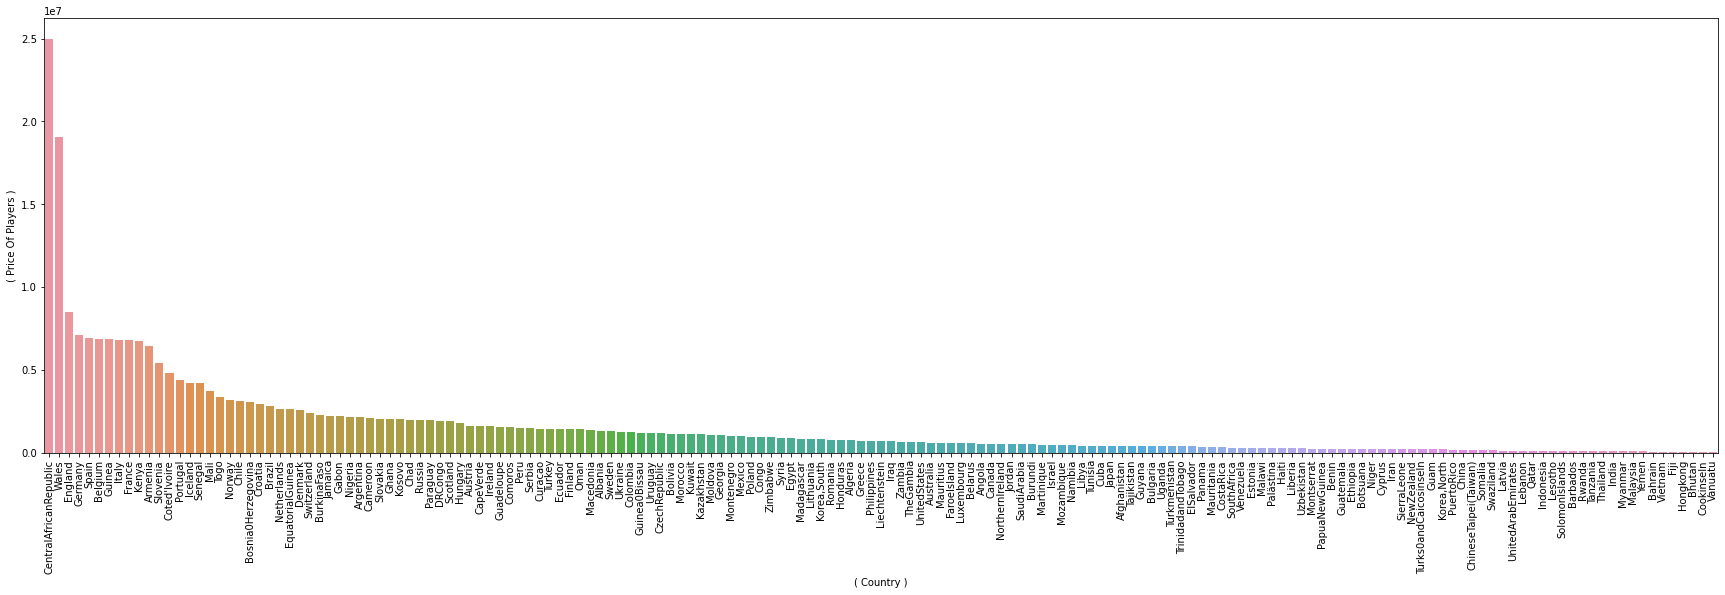

In [9]:
# Visualising average price of players from each country

country_vs_price = data.groupby(["nation"], axis=0).agg(np.mean)[["price"]].sort_values("price", ascending=False)
f, ax = plt.subplots(figsize=(30, 8))
sns.barplot(x=country_vs_price.index.values, y=country_vs_price.price)
plt.xlabel("( Country )")
plt.ylabel("( Price Of Players )")
plt.xticks(rotation=90)
plt.show()

* From the visualisation, It is clear that "Central African Republic" have a large number of highest paid players.
****
**Let's visualise average price of players from each league.**

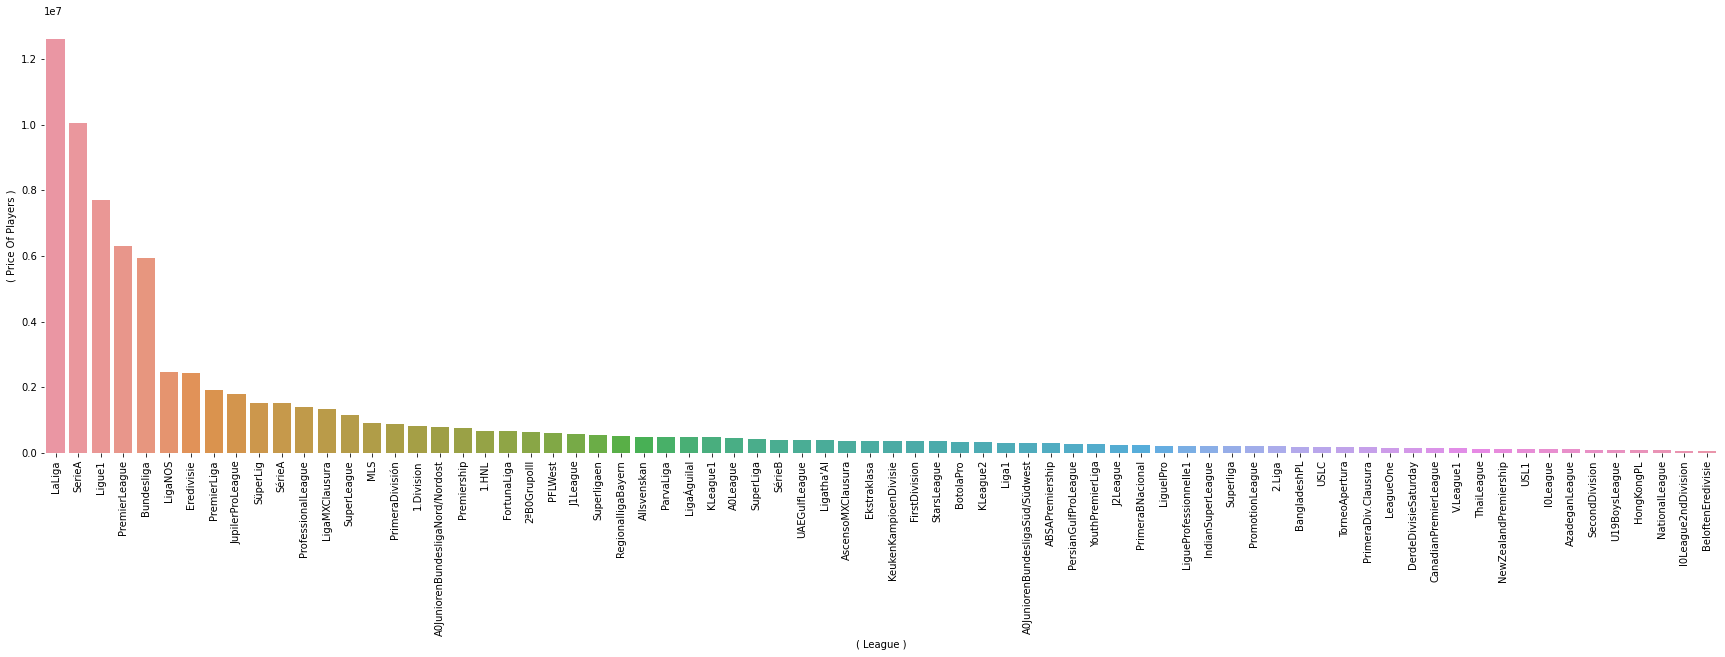

In [10]:
# Visualising average price of players from each league

team_vs_price = data.groupby(["league"], axis=0).agg(np.mean)[["price"]].sort_values("price", ascending=False)
f, ax = plt.subplots(figsize=(30, 8))
sns.barplot(x=team_vs_price.index.values, y=team_vs_price.price)
plt.xlabel("( League )")
plt.ylabel("( Price Of Players )")
plt.xticks(rotation=90)
sns.despine(left = True, bottom = True)
plt.show()

* From the visualisation, we find that Players playing in "LaLiga" League are paid the highest rate.
****
**Let's find the number of player data available under each position and visualise price of players playing in different positions.**

,n_samples
position,
Goalkeeper,2450
CentralMidfield,2044
DefensiveMidfield,1966
AttackingMidfield,1576
RightWinger,1327
LeftWinger,1275
LeftMidfield,449
Midfielder,444
RightMidfield,437


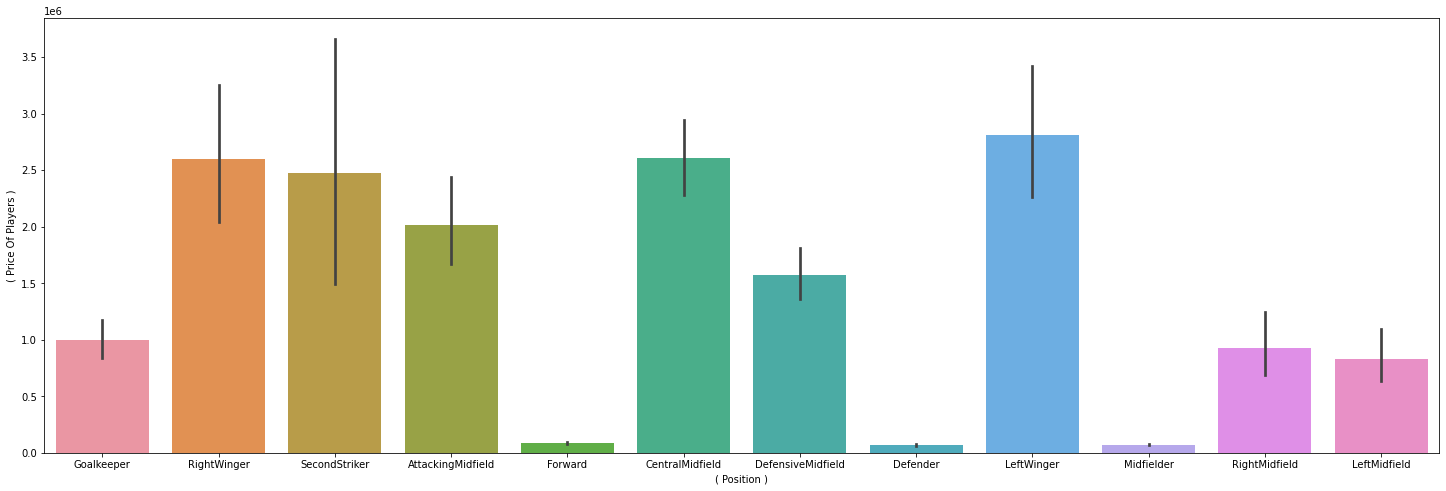

In [11]:
# Displaying number of player data available under each position

position_count = pd.DataFrame(data[["position"]].value_counts())
position_count.columns = ["n_samples"]
display(position_count)

# Visualising price of players playing in different positions

f, ax = plt.subplots(figsize=(25, 8))
sns.barplot(x=data.position, y=data.price)
plt.xlabel("( Position )")
plt.ylabel("( Price Of Players )")
plt.show()

* From the number of samples, It seems like there is not enough data for some positions.
* From the visualisation, It may seem like some positions are paid lowest but actually it is due to the insuffcient data available for those positions.
****

**Observations from our EDA:**
* We have six categorical features( "name", "first_name", "nation", "team", "league" ,"position" ). But They are stored as object data type which must be converted to categorical.
* Column "end_contract" have some null values.
* "name" and "first_name" columns can be dropped as they are not important to predict price.
* Average price of a football player according to our available data is 17,74,767 €.
* Few columns( "clean_sheet_champ", "conceded_goal_cup", "clean_sheet_cup", "conceded_goal_continent", "clean_sheet_continent" )
have only 0 as values. They can be dropped.
* It seems like "goal_continent" feature has highest correlation and is most important feature.
* Some features have very low correlation( they won't be a deciding factor of our predictions ) and may be dropped or used for feature engineering during data processing.
* Country "Central African Republic" have a large number of highest paid players.
* Players playing in "LaLiga" League are paid the highest rate.
* It may seem like some positions are paid lowest but actually it is due to the insuffcient data available for those positions( They may introduce high variance in our predictions leading to overfitting ).